In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")
random.seed(10)


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# assign xs randomly to distribution a or b based on a proportion bernoulli
# generate random Xs on uniform distribution
# assign random labels a or b
# for gaussian, X is uniform
# create 1000 x uniform data points, assign a coin flip (bernoulli) that determines which model it goes to
# we know there are 2 data generating processes, both have normally distributed error term
# one of the model assumptions is constant variance and mean 0

# in gaussian mixed model you don't start with x values, just the bernoulli

In [3]:
bernoulli = random.random()
print(f'Random bernoulli variable is assigned as {bernoulli}')
x = np.random.uniform(0, 10, 1000)
label = np.random.binomial(1, bernoulli, 1000)

noise_a = np.random.normal(0, 1, 1000) 
noise_b = np.random.normal(0, 3, 1000)

d = {'x': x, 'label': label, 'noise_a': noise_a, 'noise_b': noise_b}
df = pd.DataFrame(data=d)

df.loc[df.label == 0, 'y'] = df.x * 3 + 2 + df.noise_a
df.loc[df.label == 1, 'y'] = df.x * 4 + 10 + df.noise_b

df

Random bernoulli variable is assigned as 0.5714025946899135


,x,label,noise_a,noise_b,y
0,5.422017,1,-1.449590,-0.403743,31.284326
1,3.797705,0,0.365883,3.305582,13.758998
2,5.523032,0,-0.873022,-4.833593,17.696075
3,1.380190,1,-0.744760,-2.857165,12.663597
4,3.490416,0,-0.728897,-0.146880,11.742350
...,...,...,...,...,...
995,3.247636,1,0.530335,1.641076,24.631620
996,4.552096,1,1.461470,-1.526977,26.681409
997,7.303065,0,0.131187,-2.498394,24.040381
998,0.141723,1,-0.079133,1.210668,11.777562


<AxesSubplot:xlabel='x', ylabel='y'>

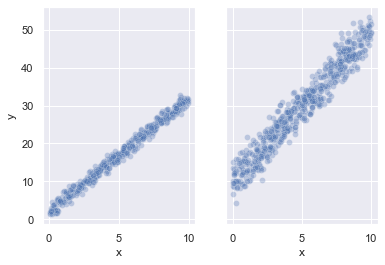

In [4]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.label == 0],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.label == 1],x='x', y='y', alpha=0.3,ax=ax[1])


<AxesSubplot:xlabel='x', ylabel='y'>

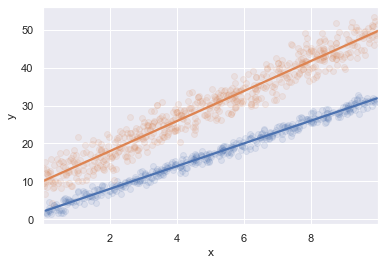

In [5]:
sns.regplot(data=df[df.label == 0],x='x', y='y',scatter_kws={'alpha':0.1})
sns.regplot(data=df[df.label == 1],x='x', y='y',scatter_kws={'alpha':0.1})
# you can see in plot below that they are different regressions


<AxesSubplot:xlabel='x', ylabel='Density'>

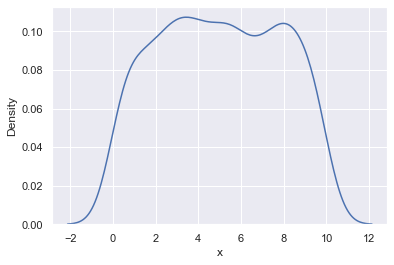

In [6]:
sns.kdeplot(data=df.x)

In [7]:
#### INITIALIZE
# set random picks for model 1 and model 2 variances (any positive number)
# beta 0 and 1 are both initialized to 1
# probability initialize to 0.5


#### EXPECTATION
# for each point, assign probability to assign to class 1 or not, and store these values. in binary case, only need 1
# given starting values, calculate probabilities. using formula, plug in x and y. store these values!


#### MAZIMIZE/UPDATE
# look at formula


In [8]:
# initialization
init_variance_a = random.randint(0, 10)
init_variance_b = random.randint(0, 10)

beta_a0 = beta_b0 = 0
beta_a1 = beta_b1 = 1
probability_a = probability_b = 0.5


In [9]:
w_a = probability_a/np.sqrt(2*np.pi*init_variance_a) * np.exp((-1/(2*init_variance_a) * (df.y - beta_a0 - beta_a1*df.x)**2))
w_b = (probability_b/np.sqrt(2*np.pi*init_variance_b)) * np.exp((-1/(2*init_variance_b) * (df.y - beta_b0 - beta_b1*df.x)**2))

pd.DataFrame(data={'w_a': w_a, 'w_b': w_b})


,w_a,w_b
0,5.058119e-26,1.344721e-22
1,2.087596e-05,6.297898e-05
2,3.530889e-07,1.907841e-06
3,2.009610e-06,8.469936e-06
4,2.795022e-04,5.820653e-04
...,...,...
995,2.298681e-18,4.922603e-16
996,1.540766e-19,4.854339e-17
997,5.919445e-12,1.538750e-10
998,1.025128e-06,4.756729e-06


In [10]:
variance_a = (w_a * (df.y - beta_a0 - beta_a1*df.x) ** 2).sum() / 0.5*(w_a.sum())
variance_b = (w_b * (df.y - beta_b0 - beta_b1*df.x) ** 2).sum() / 0.5*(w_b.sum())

print(variance_a, variance_b)


103.65131905424045 135.90608726687083
